Variable	Definition	Key

survival 	Survival 	0 = No, 1 = Yes

pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

sex 	Sex 	

Age 	Age in years 

sibsp 	# of siblings / spouses aboard the Titanic 	

parch 	# of parents / children aboard the Titanic 	

ticket 	Ticket number 

fare 	Passenger fare 

cabin 	Cabin number 

embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme();

In [15]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

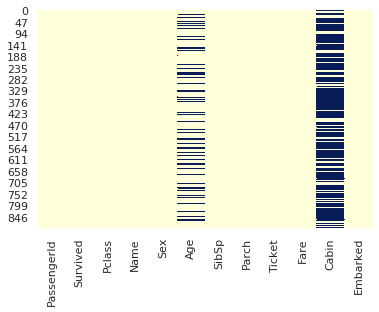

In [101]:
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [120]:
df['Title'] = 0
for i in df:
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [125]:
pd.crosstab(df.Title, df.Sex).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [133]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [136]:
df.Title.replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [137]:
pd.crosstab(df.Title, df.Sex).T.style.background_gradient(cmap='summer_r')

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [141]:
df.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [151]:
df.loc[(df.Age.isnull())&(df.Title=='Mr'), 'Age']=33
df.loc[(df.Age.isnull())&(df.Title=='Master'), 'Age']=5
df.loc[(df.Age.isnull())&(df.Title=='Miss'), 'Age']=22
df.loc[(df.Age.isnull())&(df.Title=='Mrs'), 'Age']=36
df.loc[(df.Age.isnull())&(df.Title=='Other'), 'Age']=46
df.Age.isnull().any()

False

In [159]:
df.Embarked.replace(np.nan, 'S', inplace=True)
df.Embarked.isnull().any()

False

In [73]:
Features = df.drop('Survived', axis=1)
Features
Target = df['Survived']
Target
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

/home/bibek/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensio

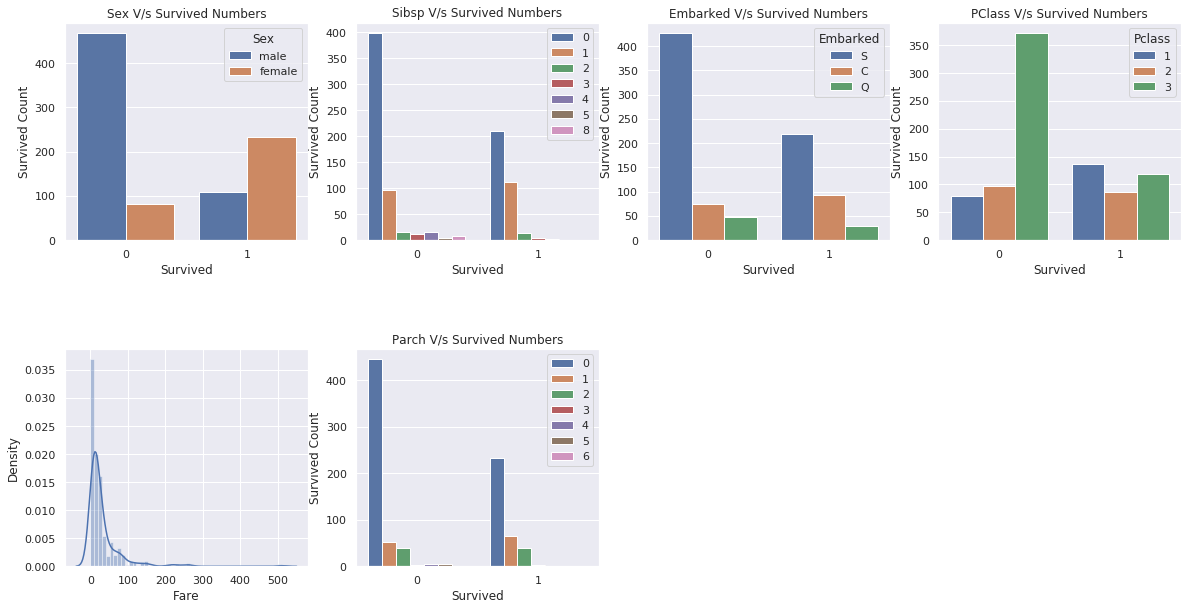

In [176]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 4, 1)
sns.countplot(x='Survived', data=df, hue='Sex')
plt.title('Sex V/s Survived Numbers')
plt.ylabel('Survived Count')
plt.subplot(2, 4, 2)
sns.countplot(x='Survived', data=df, hue='SibSp')
plt.title('Sibsp V/s Survived Numbers')
plt.ylabel('Survived Count')
plt.legend(loc=1)
plt.subplot(2, 4, 3)
sns.countplot(x='Survived', data=df, hue='Embarked')
plt.title('Embarked V/s Survived Numbers')
plt.ylabel('Survived Count')
plt.subplot(2, 4, 4)
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.title('PClass V/s Survived Numbers')
plt.ylabel('Survived Count')
plt.subplot(2, 4, 6)
sns.countplot(x='Survived', data=df, hue='Parch')
plt.title('Parch V/s Survived Numbers')
plt.ylabel('Survived Count')
plt.legend(loc=1)
plt.subplot(2, 4, 5)
df.Fare = df.Fare.to_numpy()
sns.distplot(df.Fare, kde=True)
# plt.title('PClass V/s Survived Numbers')
# plt.ylabel('Survived Count')
plt.show();


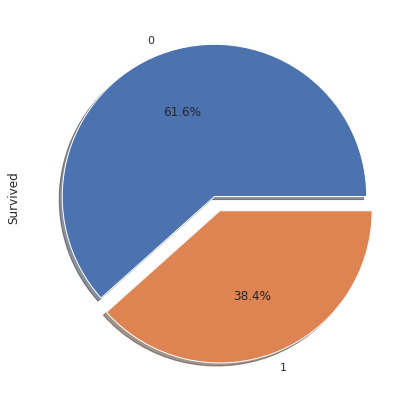

In [195]:
df.Survived.value_counts().plot.pie(shadow=True, autopct='%1.1f%%', explode=[0,0.1], figsize=(10,7));


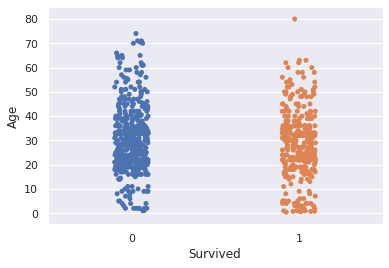

In [191]:
sns.stripplot(x='Survived', y='Age', data=df, jitter=True);

In [196]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

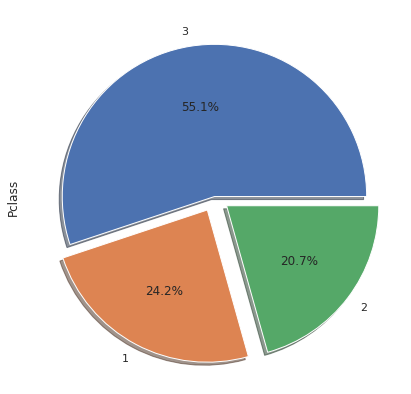

In [199]:
df.Pclass.value_counts().plot.pie(shadow=True, autopct='%1.1f%%', explode=[0,0.1, 0.1], figsize=(10,7));


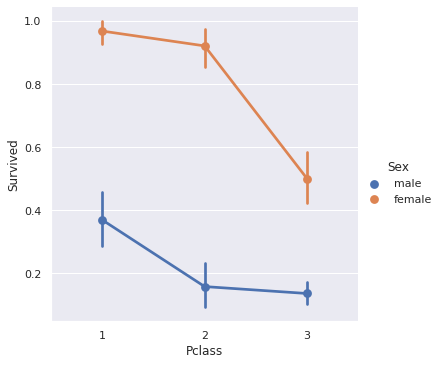

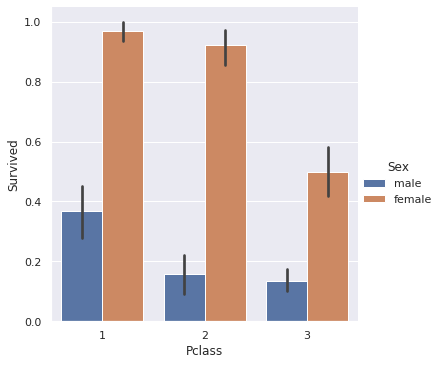

In [215]:

# plt.subplot(1, 4, 1)
sns.catplot(x='Pclass',y='Survived',kind='point',data=df, hue='Sex')
# plt.subplot(1,4,2)
sns.catplot(x='Pclass',y='Survived',kind='bar',data=df, hue='Sex')
plt.show();

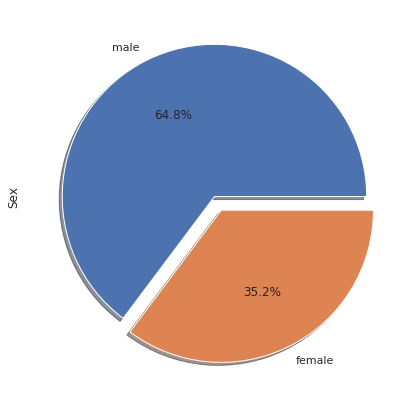

In [221]:
df.Sex.value_counts().plot.pie(shadow=True, autopct='%1.1f%%', explode=[0, 0.1], figsize=(10,7));



In [223]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

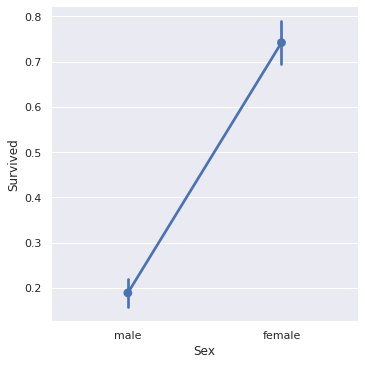

In [226]:
sns.catplot(x='Sex',y='Survived',kind='point',data=df);

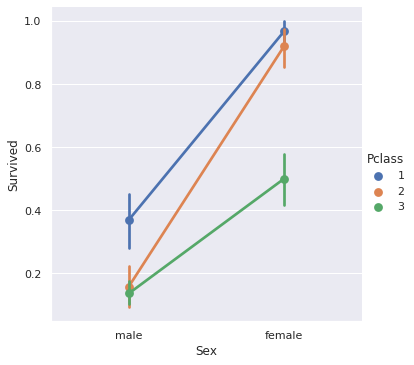

In [229]:
sns.catplot(x='Sex',y='Survived',kind='point',data=df, hue='Pclass');

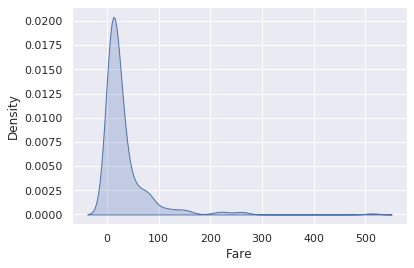

In [241]:
sns.kdeplot(df.Fare, shade=True);

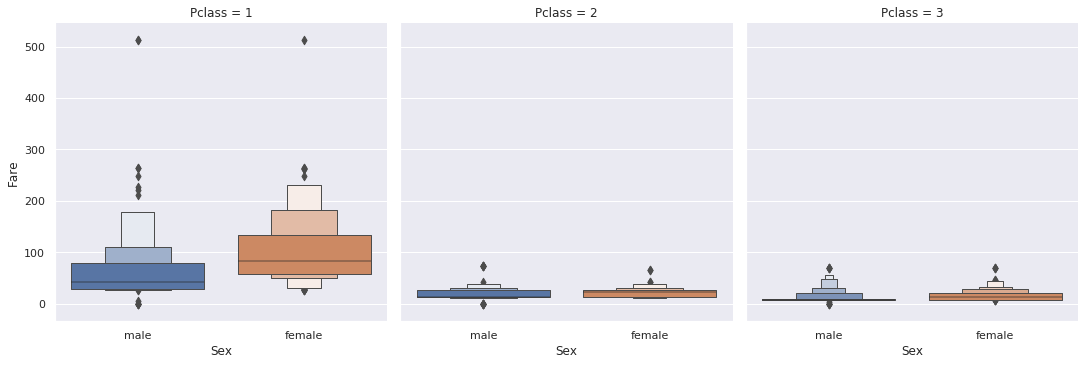

<Figure size 1440x720 with 0 Axes>

In [249]:
sns.catplot(x='Sex',y='Fare',data=df,kind='boxen',col='Pclass')
plt.figure(figsize=(20,10))
plt.show();

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

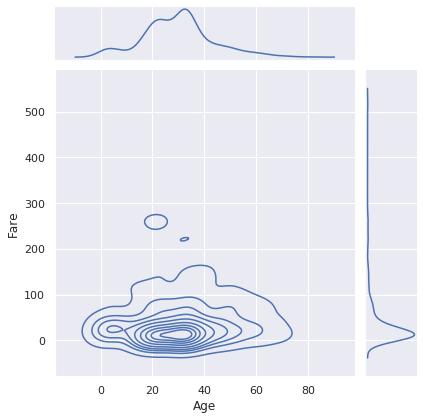

<Figure size 1440x720 with 0 Axes>

In [255]:
sns.jointplot(x='Age',y='Fare',data=df, kind='kde')
plt.figure(figsize=(20,10));

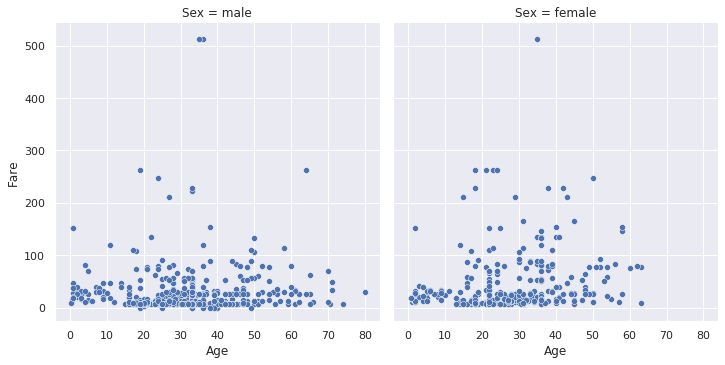

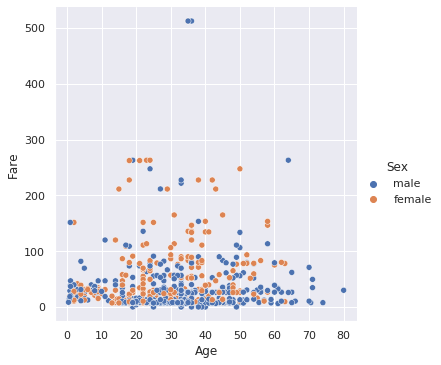

In [260]:
sns.relplot(x='Age',y='Fare',data=df,col='Sex');
sns.relplot(x='Age',y='Fare',data=df,hue='Sex');

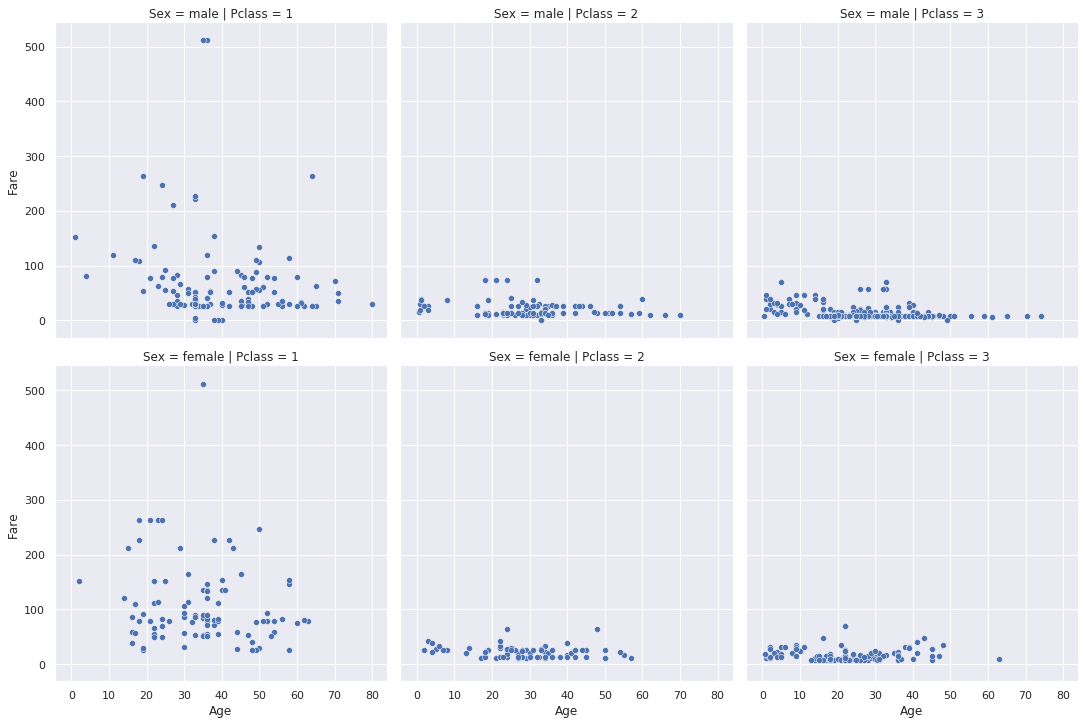

In [263]:
sns.relplot(x='Age',y='Fare',data=df,row='Sex',col='Pclass');

In [270]:
df['Fare_range'] = pd.qcut(df.Fare, 4)
df.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [273]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the ship:',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.841941638608304 Years


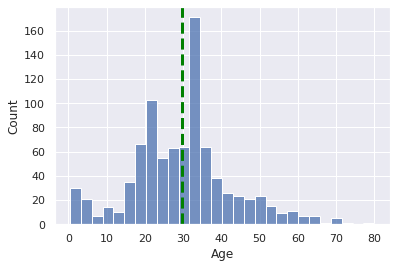

In [284]:
sns.histplot(df.Age);
plt.axvline(df[df['Age']<=100].Age.mean(),color='green',linestyle='dashed',linewidth=3);

In [290]:
df['Age_group'] = 0
df.loc[(df['Age']<=16), 'Age_group']=0
df.loc[(df['Age']>16)&(df['Age']<=32), 'Age_group']=1
df.loc[(df['Age']>32)&(df['Age']<=48), 'Age_group']=2
df.loc[(df['Age']>48)&(df['Age']<=64), 'Age_group']=3
df.loc[(df['Age']>64), 'Age_group']=4
df['Age_group'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_group
1,382
2,325
0,104
3,69
4,11


/home/bibek/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


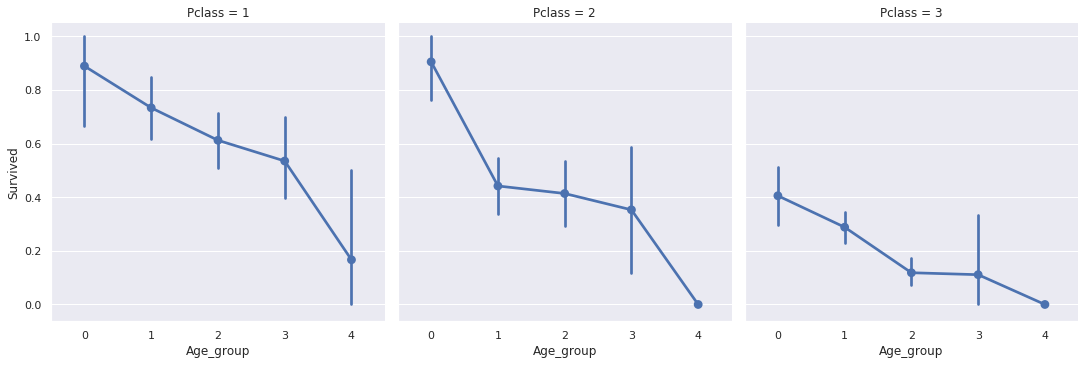

In [307]:
sns.catplot('Age_group','Survived',col='Pclass',data=df, kind='point')
plt.ioff();

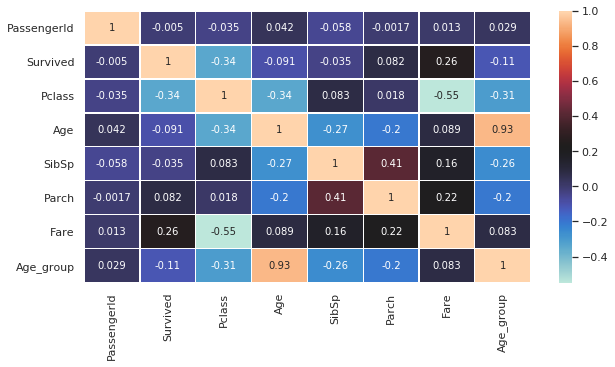

In [319]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,5)